In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


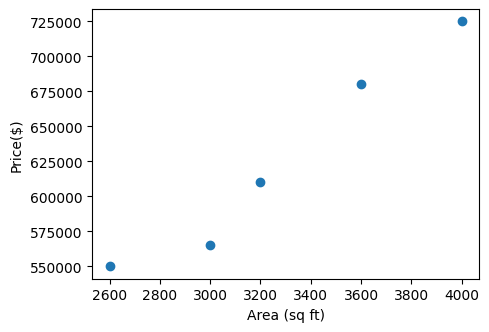

In [3]:
plt.figure(figsize=[5,3.5])
plt.scatter(df['area'], df['price'])
plt.xlabel('Area (sq ft)')
plt.ylabel('Price($)')
plt.show()

### Ordinary Least Squares

In [4]:
from sklearn import linear_model
reg = linear_model.LinearRegression() 
reg.fit(df[['area']], df.price) 

LinearRegression()

In [5]:
reg.predict(pd.Series([3300], name="area").to_frame())

array([628715.75342466])

In [6]:
reg.predict(df[['area']])

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

Text(0, 0.5, 'Price($)')

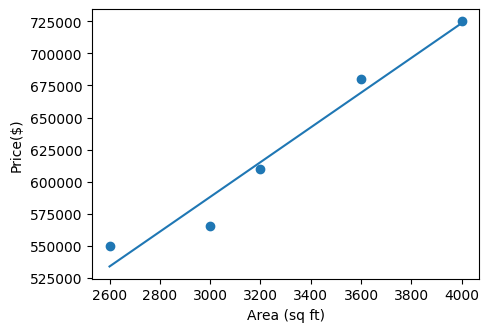

In [7]:
#Plotting predictions
plt.figure(figsize=[5,3.5])

plt.scatter(df['area'], df['price'])
plt.plot(df['area'], reg.predict(df[['area']]))
plt.xlabel('Area (sq ft)')
plt.ylabel('Price($)')

In [8]:
print(reg.coef_)
print(reg.intercept_)

[135.78767123]
180616.43835616432


Evaluation Metrics

In [9]:
from sklearn.metrics import *
mean_absolute_error(df['price'], reg.predict(df[['area']]))

11246.57534246575

In [10]:
mean_absolute_percentage_error(df['price'], reg.predict(df[['area']]))

0.019201242020345188

__Testing data__

In [11]:
test = pd.DataFrame([1000, 1500, 2300, 3540, 4120], columns = ['area'])
test.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [12]:
reg.predict(test)

array([316404.10958904, 384297.94520548, 492928.08219178, 661304.79452055,
       740061.64383562])

In [13]:
test['Predicted Prices'] = reg.predict(test)
test.head()

,area,Predicted Prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


### Salary data

In [14]:
s = pd.read_csv("https://raw.githubusercontent.com/weldonyang/Simple-Linear-Regression-Practice/main/Salary_Data.csv")
s.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [15]:
X = s.iloc[:,:-1].values
Y = s.iloc[:,1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3 ,random_state = 0)

In [17]:
reg2 = linear_model.LinearRegression()
reg2.fit(X_train,Y_train)

LinearRegression()

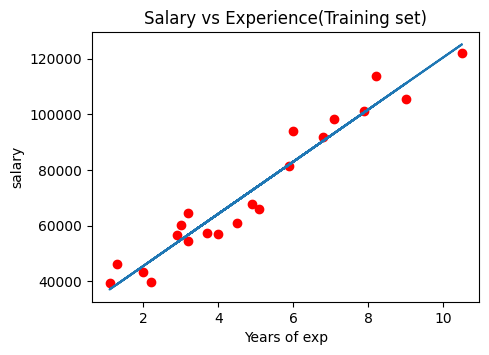

In [18]:
plt.figure(figsize=[5,3.5])
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, reg2.predict(X_train))
plt.title('Salary vs Experience(Training set)')
plt.xlabel('Years of exp')
plt.ylabel('salary')
plt.show()

In [19]:
y_pred = reg2.predict(X_test)
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

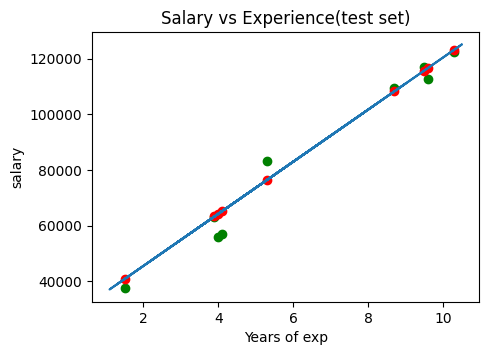

In [20]:
plt.figure(figsize=[5,3.5])
plt.scatter(X_test, Y_test, color = 'green')
plt.scatter(X_test, y_pred, color = 'red')
plt.plot(X_train, reg2.predict(X_train))
plt.title('Salary vs Experience(test set)')
plt.xlabel('Years of exp')
plt.ylabel('salary')
plt.show()

__Evaluation Metrics__

In [21]:
from sklearn.metrics import *

In [22]:
print('MAE :',mean_absolute_error(Y_test, y_pred))
print("MAPE : ", mean_absolute_percentage_error(Y_test, y_pred))
print('MSE :',mean_squared_error(Y_test, y_pred))
print('RMSE :',np.sqrt(mean_squared_error(Y_test, y_pred)))
print('MLSE :',np.sqrt(mean_squared_log_error(Y_test, y_pred)))
print('R Squared :',r2_score(Y_test, y_pred))
print('Variance :',explained_variance_score(Y_test, y_pred))

MAE : 3737.417861878896
MAPE :  0.057770876996291826
MSE : 23370078.800832972
RMSE : 4834.260936361728
MLSE : 0.07603710837968713
R Squared : 0.9740993407213511
Variance : 0.9772844627508654


### Ridge regression

In [23]:
reg3 = linear_model.Ridge(alpha=.5)
reg3.fit(df[['area']], df.price) 

Ridge(alpha=0.5)

In [24]:
y_pred3 = reg3.predict(df[['area']])
y_pred3 

array([533664.42308886, 587979.46833071, 615136.99095163, 669452.03619348,
       723767.08143532])

Text(0, 0.5, 'Price($)')

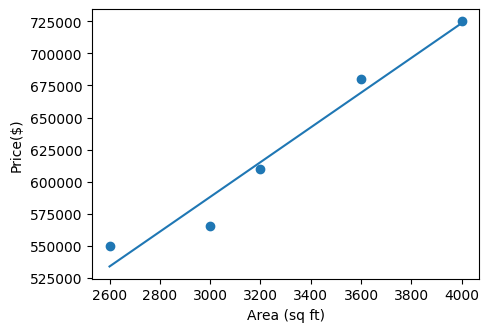

In [25]:
plt.figure(figsize=[5,3.5])
plt.scatter(df['area'], df['price'])
plt.plot(df['area'], y_pred3)
plt.xlabel('Area (sq ft)')
plt.ylabel('Price($)')

Evaluation Metrics

In [26]:
print(mean_absolute_error(df['price'], y_pred3))
print(mean_absolute_percentage_error(df['price'], y_pred3))

11246.58371293503
0.019201251949242482


### Lasso regression

In [27]:
reg4 = linear_model.Lasso(alpha=0.1)
reg4.fit(df[['area']], df.price) 

Lasso(alpha=0.1)

In [28]:
y_pred4 = reg4.predict(df[['area']])
y_pred4 

array([533664.38385274, 587979.45217466, 615136.98633562, 669452.05465753,
       723767.12297945])

Text(0, 0.5, 'Price($)')

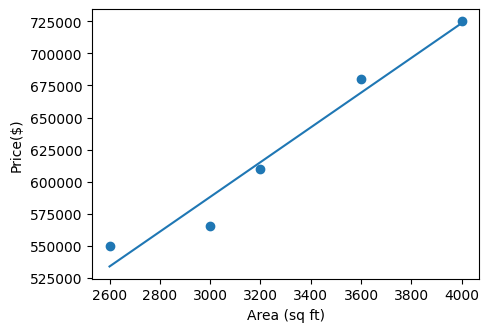

In [29]:
plt.figure(figsize=[5,3.5])
plt.scatter(df['area'], df['price'])
plt.plot(df['area'], y_pred4)
plt.xlabel('Area (sq ft)')
plt.ylabel('Price($)')

In [30]:
print(mean_absolute_error(df['price'], y_pred4))
print(mean_absolute_percentage_error(df['price'], y_pred4))

11246.57540410955
0.019201242093465912
